In [2]:
# Principal Component Analysis
# принципиально PCA это просто упрощение и сворачивание размерности 
# до приемлемой - после чего работа с этой приемлемой размерностью 
# dimensinality reduction 
# или в виде графика или в виде аналитики 
# по сути это проекции же данных 

%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use("seaborn-whitegrid")

/tmp/ipykernel_584699/420329241.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

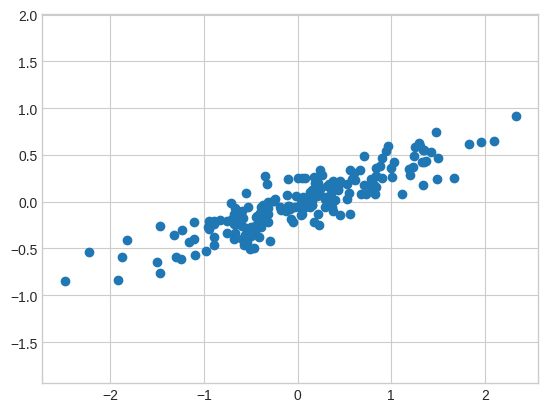

In [3]:
# Introducing Principal Component Analysis 
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2,200)).T
plt.scatter(X[:,0], X[:,1])
plt.axis("equal")

In [4]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [5]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

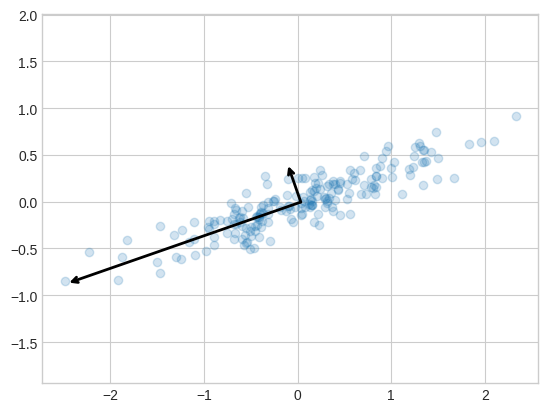

In [6]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle="->", linewidth=2, 
                      shrinkA=0, shrinkB=0)
    ax.annotate("",v1, v0, arrowprops=arrowprops)

# plot data 
plt.scatter(X[:,0], X[:,1], alpha=0.2)
for length,vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis("equal")

# что мы тут наблюдаем - длинная ось - и короткая ось 
# это вляиния разрешений на итоговый результат - очевидно что если короткую 
# схлопнуть мы в прогнозировании сильно не потеряем

In [7]:
# PCA and Dimensionality Reduction
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape: ", X.shape)
print("transform shape:", X_pca.shape)

original shape:  (200, 2)
transform shape: (200, 1)


(-2.731158226766438,
 2.6099018832593317,
 -0.9672765706389316,
 1.0060642308539953)

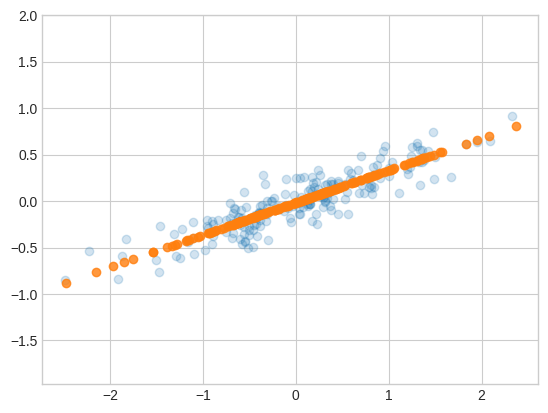

In [8]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:,0], X[:,1], alpha=0.2)
plt.scatter(X_new[:,0], X_new[:,1], alpha=0.8)
plt.axis("equal")

# что происходит: мы взяли не нужную ось и урезали её 
# то что получилось в итоге - это рыжие точки - это точки с урезанной 
# осью - которую мы сократили 

In [10]:
# PCA for Visualization: Handwritten Digits 
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [11]:
pca = PCA(2) # project from 64 to 2 dimension 
# тут кстати при уменьшении размерности еще и появиться возможность 
# нормально визуализацию делать графическую - то есть закономерности 
# видеть глазами 
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


/tmp/ipykernel_584699/3073353065.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap("rainbow", 10)


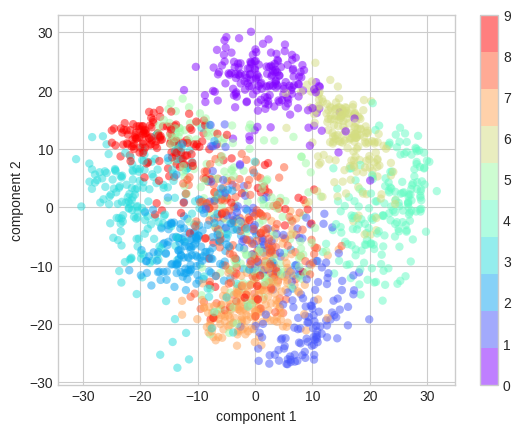

In [12]:
plt.scatter(
    projected[:,0], projected[:,1],
    c=digits.target, edgecolor="none", alpha=0.5,
    cmap=plt.cm.get_cmap("rainbow", 10)
)
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.colorbar()

Text(0, 0.5, 'cumulative explained variance')

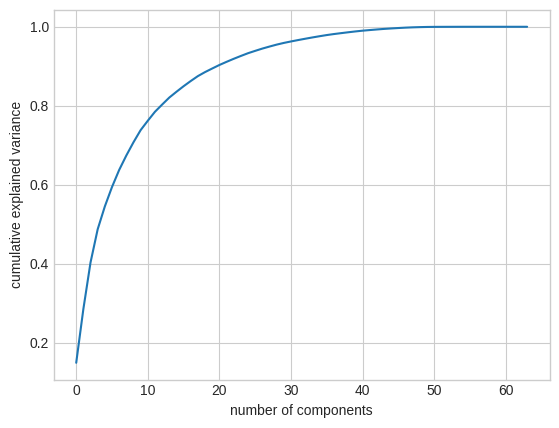

In [13]:
# Choosing the Number of Components 
# количество компонентов зависит лишь от одного - на сколько уменьшиться 
# предсказываемость результата в результате их уменьшения 
# то есть это по сути единственным маркером у нас и является 

pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")

# как видим после 20 компонентов что их больше становиться что меньше 
# значения на результаты предсказания не влияет 
# однако как мы понимаем 20 компонентов визуализовать не выйдет 

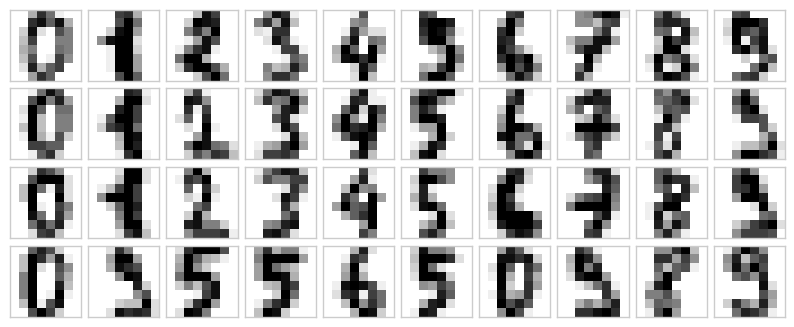

In [15]:
# PCA as Noise Filtering 
# по сути же лишние компоненты и есть шум - то есть их убирая мы данные делаем 
# более чистыми ОДНАКО часто именно этот шум и отличает 
# спорный элемент классификации от другого - так что надо его сохранять
# для сложных случаев 

def plot_digits(data):
    fig,axes = plt.subplots(
        4,10,figsize=(10,4),
        subplot_kw={
            "xticks":[], "yticks":[]
        },
        gridspec_kw=dict(hspace=0.1, wspace=0.1)
    )
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),
                  cmap="binary", interpolation="nearest", clim=(0,16))
plot_digits(digits.data)

# это у нас картинки без шума

In [16]:
# добавим шума - чтобы было что убирать 
rng = np.random.default_rng(42)
rng.normal(10,2)


10.609434159508863

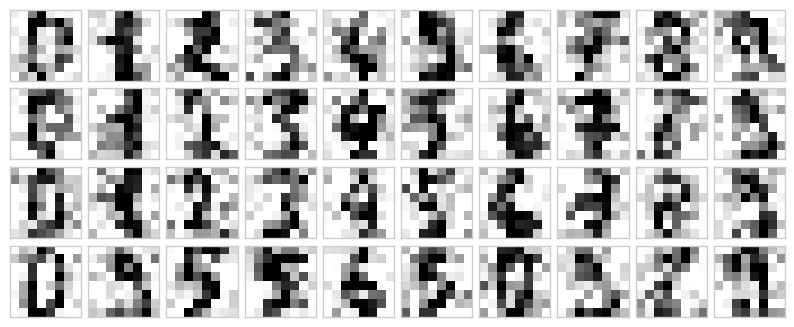

In [17]:
rng = np.random.default_rng(42)
noisy = rng.normal(digits.data, 4)
plot_digits(noisy)

In [18]:
# убираем с помощью PCA 
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

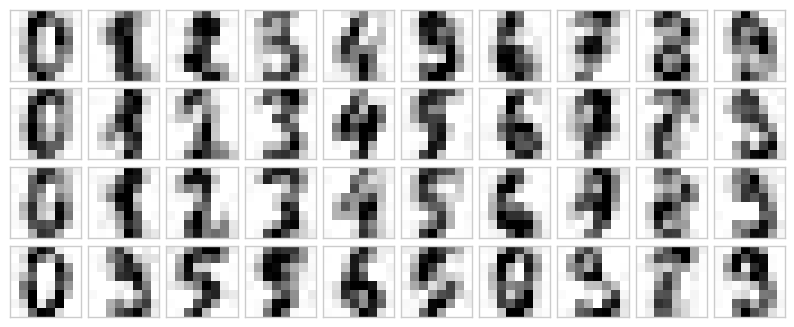

In [19]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)